# How Many Loops Can You Slither Around? (1) Express

link: https://thefiddler.substack.com/p/how-many-loops-can-you-slither-around

## I. Puzzle

Nikoli the snake wants to slither along a loop through a four-by-four grid of points. To form a loop, Nikoli can connect any horizontally or vertically adjacent points with a line segment. However, Nikoli has certain standards when it comes to loop construction. In particular:The loop can never cross over itself.No two corners of the loop can meet at the same point.Once Nikoli has crossed the connection between two points, Nikoli can’t cross it again (in either direction).For example, the following two constructions are valid loops:

[image]

Meanwhile, the following three constructions are not valid. The one on the left crosses over itself, the one in the middle has two corners that meet at a single point, and the one on the right requires Nikoli to pass over the same line segment twice.

[image]

How many unique loops can Nikoli make on the four-by-four grid? (For any given loop, Nikoli can travel in two directions around it. However, these should still be counted as a single loop.)

# II. Solution (not correct, see below)

We assume that by rotating a shape we do not get a different loops e.g. a 2x1 shape and a 1x2 shape are count the same loop. 
Then there are 40 different loops Nikolia can create:

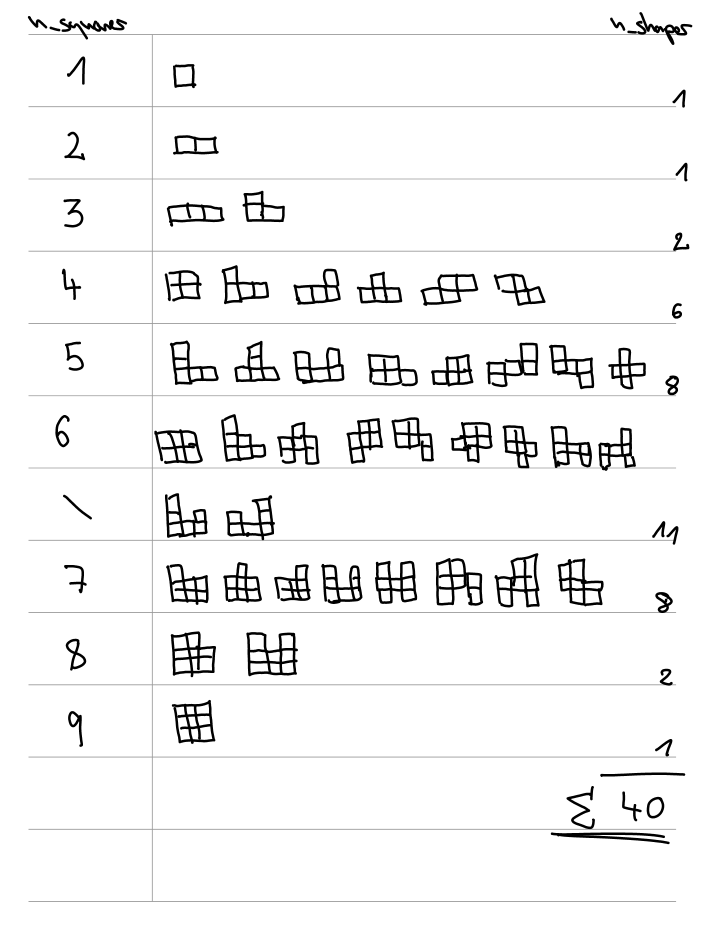

In [110]:
from IPython import display
display.Image("files/loops.png")

# III. Solution v2

Our assumption that a rotation does not lead to a different loop was not correct. Further, the position of the shape within the sqaures also count, e.g. there a nine different loops with one square. 


In [109]:
import networkx as nx
import itertools
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt

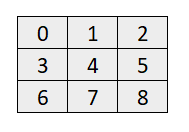

In [111]:
# Coordinates of the squares
display.Image("files/loops_2.png")

In [112]:
counter = 0

# Create a set with all possible vertices_combinations
vertices_combinations = []
for i in range(0,10):
	vertices_combinations += list(itertools.combinations(range(9),i))

valid_combinations = []

# Go through the vertices_combinations to find the valid graphs.  
for vertices in vertices_combinations:

	# Add the vertices to the graph
	graph = nx.Graph()
	graph.add_nodes_from(vertices)

	if len(vertices) == 0: # empty set
		valid_combinations.append(False)
		continue

	# Doughnut case: If all vertices 1, 3, 5, 7 are in the graph and the middle vertex (4) is not, we have an invalide graph, because there are at lease two loops (around the 4 
	#  and the outer loop).
	if not 4 in vertices:
		if all(elem in vertices for elem in [1,3,5,7]):
			valid_combinations.append(False)
			continue

	# If two adjacent vertices are in the graph, then add an edge between them to the graph.
	for i in [0,1]:	# Horizontal edges
		for j in [0,3,6]:
			if i+j in vertices and i+j+1 in vertices:
				graph.add_edges_from([(i+j,i+j+1)])

	for i in [0,3]: # Vertical edges
		for j in [0,1,2]:
			if i+j in vertices and i+j+3 in vertices:
				graph.add_edges_from([(i+j,i+j+3)])

	# Check if all vertices are connected, then we have a valid loop.
	if nx.is_connected(graph):
		counter += 1
		valid_combinations.append(True)
	else:
		valid_combinations.append(False)

print(f'\nSolution: There are {counter} valid loops.')


Solution: There are 213 valid loops.


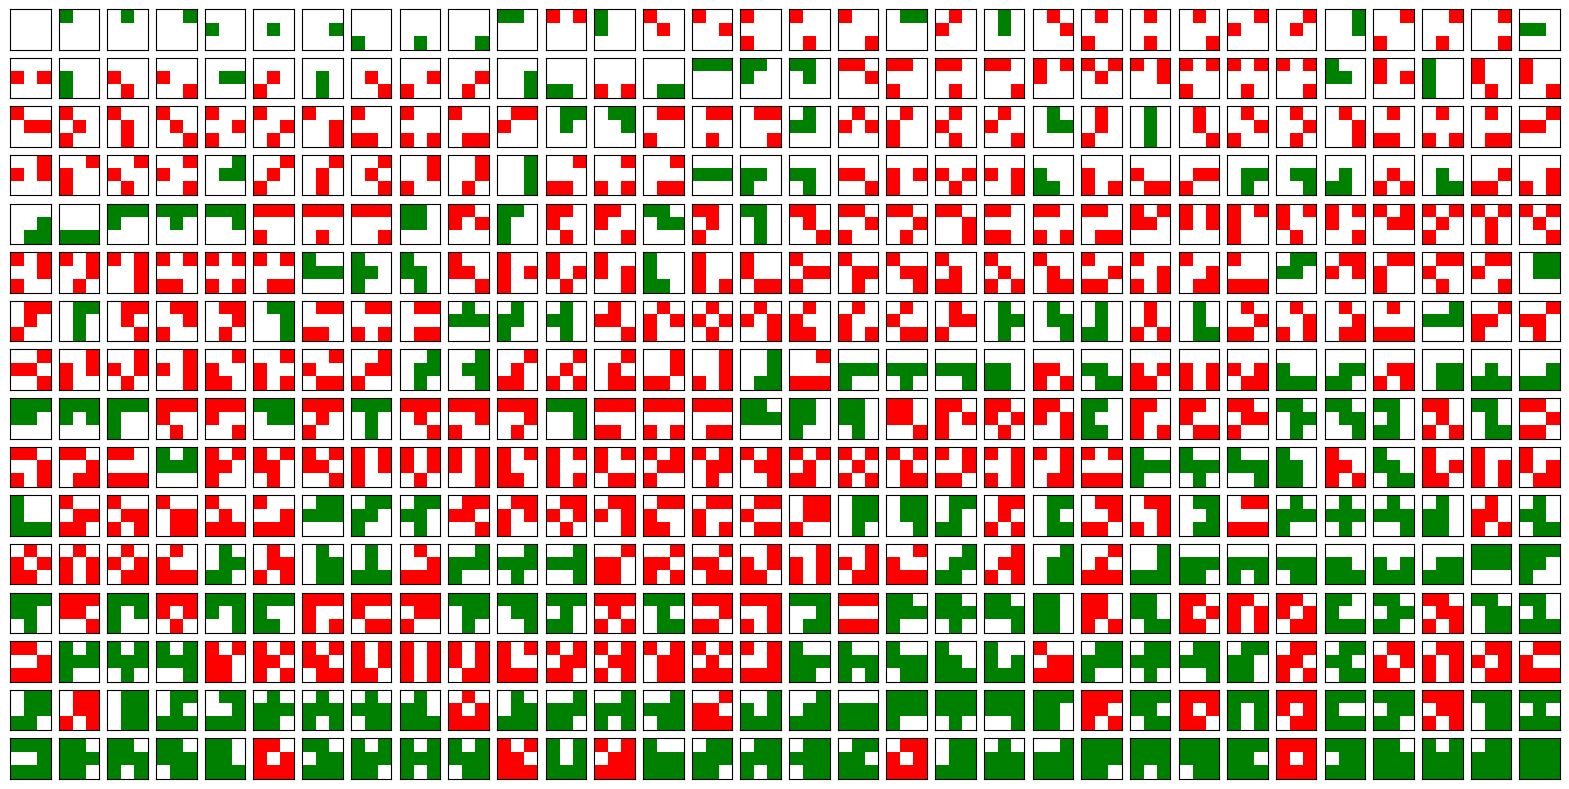

In [119]:
# Create array for each vertices_combinations: 
matrix_arr = [] 
for index, vertices in enumerate(vertices_combinations):
	matrix_arr.append([
		valid_combinations[index], 
		np.array([True if i in vertices else False for i in range(9)]).reshape(3,3)])
	
fig, axs = plt.subplots(nrows=16, ncols=32, figsize=(20, 10), subplot_kw={'xticks': [], 'yticks': []})

for index, ax  in enumerate(axs.flat):
	if matrix_arr[index][0]:
		colour_map = mplt.colors.ListedColormap(['white', 'green'])
	else:
		colour_map = mplt.colors.ListedColormap(['white', 'red'])
	norm = mplt.colors.BoundaryNorm([0, 0.5, 1], colour_map.N)
      
	ax.imshow(matrix_arr[index][1], cmap=colour_map, norm=norm)

plt.show()